# House Price Prediction using Regularized Linear Models

##  Problem Statement

The objective of this project is to predict house prices using regression models and analyze the impact of regularization techniques (L1 and L2).

Here i performed:
- Exploratory Data Analysis (EDA)
- Handle missing values
- Apply feature engineering
- Train Linear, Ridge, and Lasso regression models
- Compare model performance


##  Importing Required Libraries

In this section, we import essential libraries for:
- Data manipulation (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Machine Learning (Scikit-learn)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Loading the Dataset

The dataset is loaded into a Pandas DataFrame.
We inspect the first few rows to understand the structure of the data.


In [154]:
df=pd.read_csv('train_housep.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Initial Data Exploration

Here we examine:
- Dataset dimensions
- Summary statistics of numerical features
- Data types and missing values


In [155]:
df.shape

(1460, 81)

In [156]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###  Feature Categorization

Features are divided into parts:
- Numerical features
- Categorical features

This helps in applying appropriate preprocessing techniques.


In [158]:
num_features=df.select_dtypes(include=['int64','float64'])
cat_features=df.select_dtypes(include=['object'])

In [159]:
num_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [160]:
num_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [161]:
cat_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [162]:
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Missing Value Analysis

Here We identify columns with missing values and analyze their frequency.
This helps determine whether to:
- Drop columns
- Impute values
- Treat them as separate categories


In [163]:
missing=df.isnull().sum()

In [164]:
missing=missing[missing>0].sort_values(ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

### Correlation Analysis

A correlation heatmap is generated to:
- Understand relationships between numerical features
- Detect multicollinearity
- Identify features strongly correlated with SalePrice


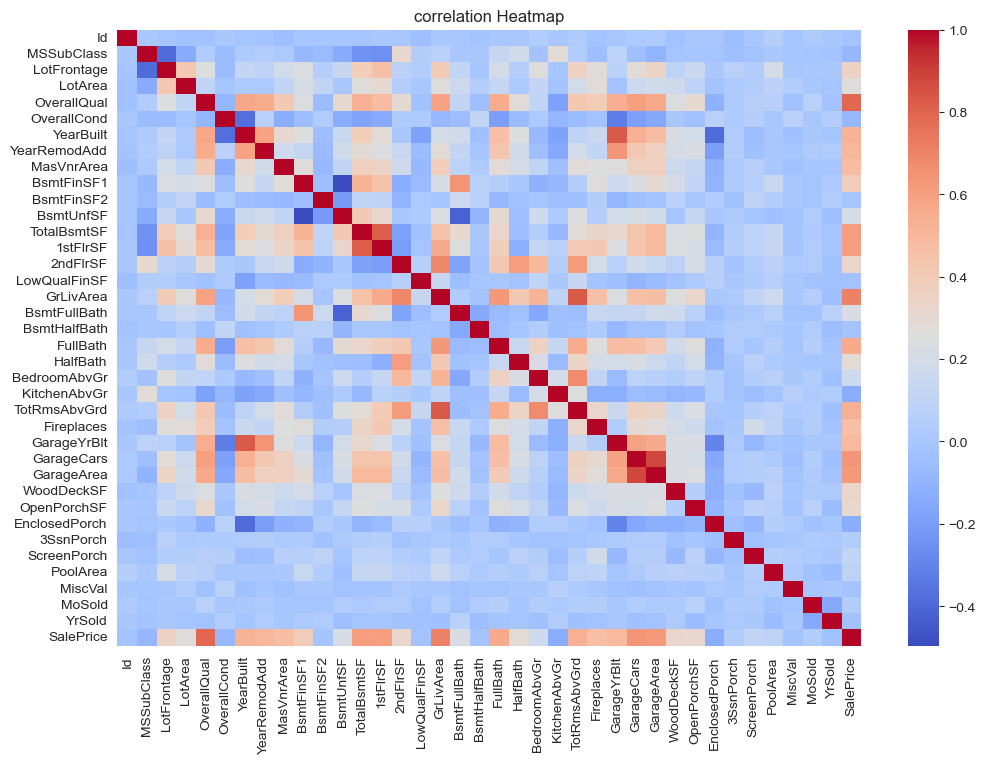

In [165]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

### Features Most Correlated with Target

We extract features most positively correlated with SalePrice.
These features are likely strong predictors.


In [166]:
saleprice_corr=corr_matrix['SalePrice'].sort_values(ascending=False)
saleprice_corr.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### Relationship Between Key Features and SalePrice

Scatter plots and boxplots are used to visualize how important features influence house prices.


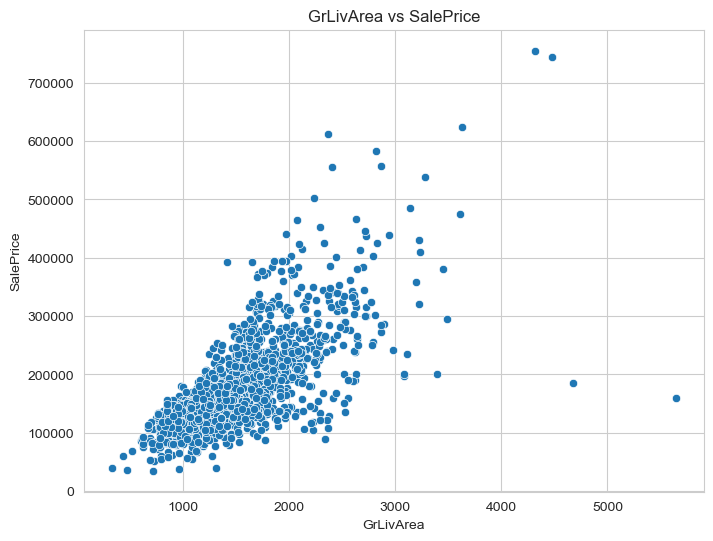

In [167]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.show()

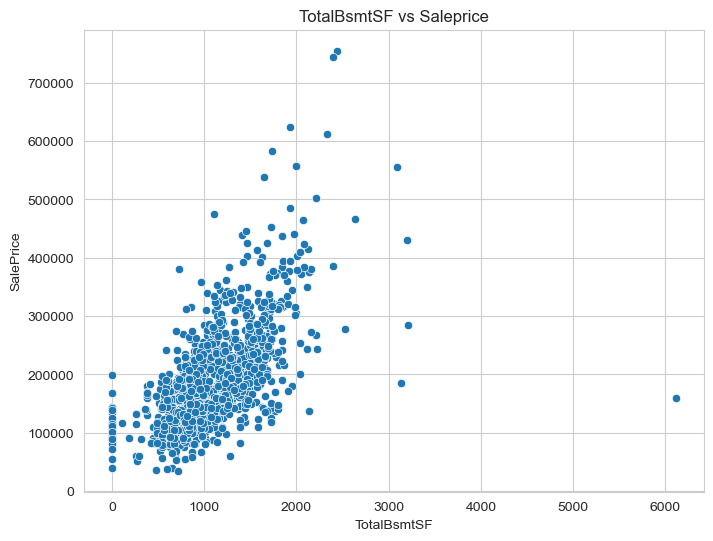

In [168]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['TotalBsmtSF'],y=df['SalePrice'])
plt.title('TotalBsmtSF vs Saleprice')
plt.show()


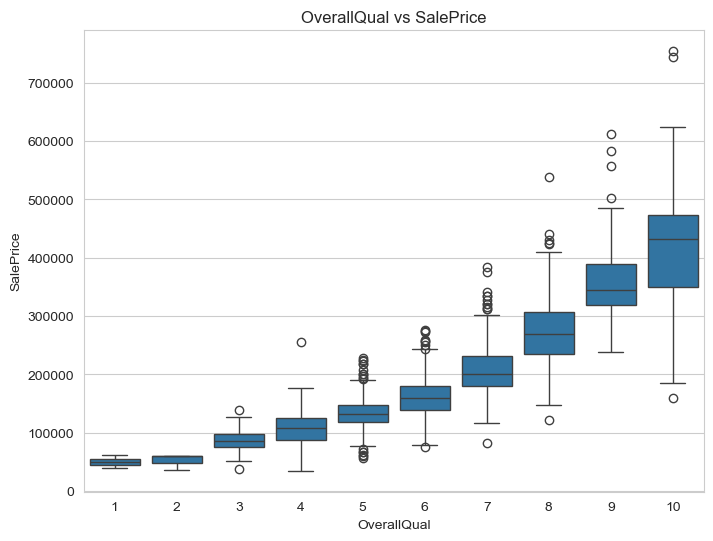

In [169]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['OverallQual'],y=df['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.show()

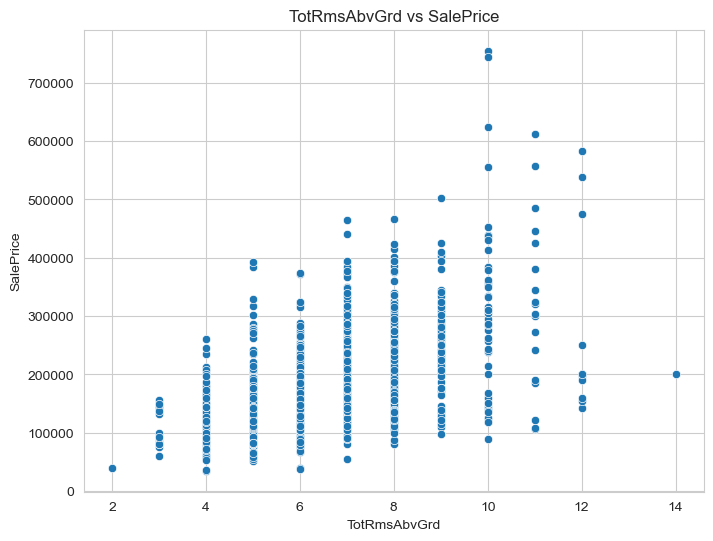

In [170]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['TotRmsAbvGrd'],y=df['SalePrice'])
plt.title('TotRmsAbvGrd vs SalePrice')
plt.show()

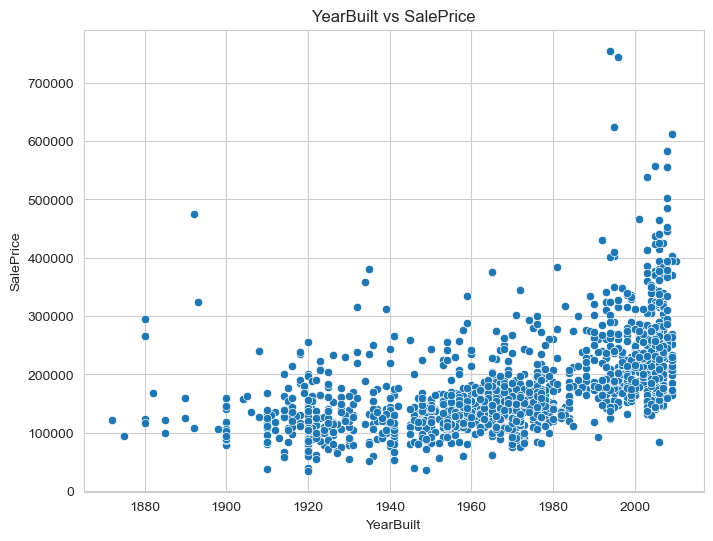

In [171]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['YearBuilt'],y=df['SalePrice'])
plt.title('YearBuilt vs SalePrice')
plt.show()

### Target Variable Distribution

We analyze the distribution of SalePrice to check:

- Skewness
- Outliers
- Normality assumption

Observation:
The distribution appears right-skewed, indicating the need for transformation.


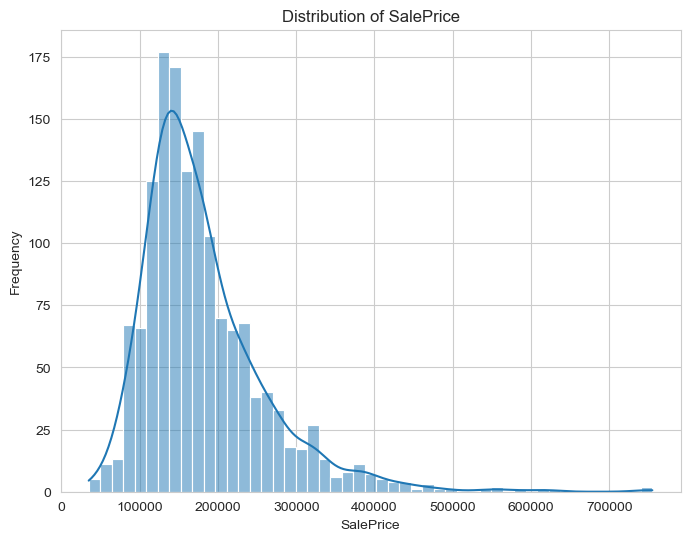

In [172]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'],kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [173]:
df['SalePrice'].skew()

np.float64(1.8828757597682129)

### Log Transformation of Target

Since we could see that SalePrice is positively skewed, we apply log transformation to:

- Reduce skewness
- Stabilize variance
- Improve linear model performance

After transformation, skewness reduces significantly.


In [174]:
df['SalePrice_log']= np.log(df['SalePrice'])

In [175]:
df['SalePrice_log'].skew()

np.float64(0.12133506220520406)

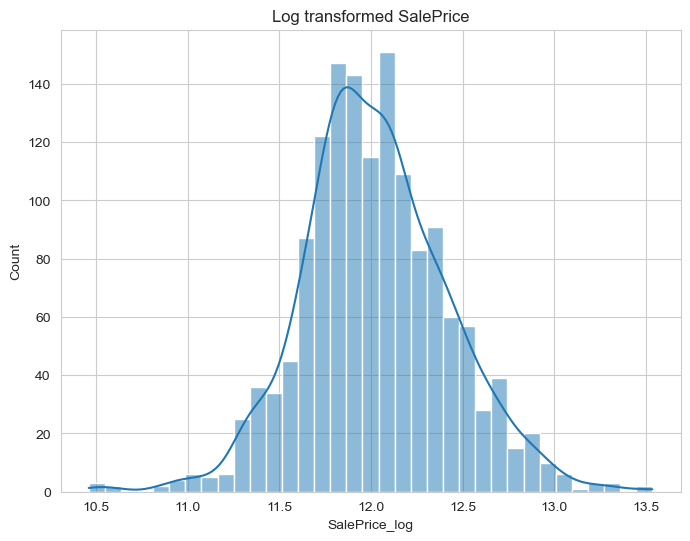

In [176]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice_log'],kde=True)
plt.title('Log transformed SalePrice')
plt.show()

### Missing Value Percentage Analysis

Here We calculated the percentage of missing values in each column.

Columns with more than 80% missing values are removed to avoid noise and unreliable imputations.


In [177]:
missing_percent=df.isnull().mean() * 100
missing_percent=missing_percent.sort_values(ascending=False)

In [178]:
missing_percent.head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64

### Dropping Highly Missing Columns

Here Columns with extremely high missing values (>80%) are removed:

- PoolQC
- MiscFeature
- Alley
- Fence

These features contribute little predictive value due to insufficient data.


In [179]:
col_to_drop=missing_percent[missing_percent>80].index
df=df.drop(columns=col_to_drop)

In [180]:
print(col_to_drop)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [182]:
df.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageQual       81
GarageType       81
GarageFinish     81
GarageCond       81
GarageYrBlt      81
BsmtExposure     38
BsmtFinType2     38
dtype: int64

### Handling Remaining Missing Values

Different imputation strategies were applied:

- Categorical features → Filled with 'None'
- Numerical features → Filled with 0 or median
- Electrical → Filled with mode

This ensures no missing values remain before modeling.


In [183]:
none_cols=['MasVnrType','FireplaceQu','LotFrontage','GarageQual','GarageType','GarageFinish','GarageCond','BsmtExposure','BsmtFinType2']
for col in none_cols :
    df[col].fillna('None',inplace=True)

C:\Users\ANSHU\AppData\Local\Temp\ipykernel_24956\2421520553.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None',inplace=True)
C:\Users\ANSHU\AppData\Local\Temp\ipykernel_24956\2421520553.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna('None',inplace=True)


In [184]:
df['GarageYrBlt']=pd.to_numeric(df['GarageYrBlt'],errors='coerce')
df['GarageYrBlt'].fillna(0,inplace=True)

C:\Users\ANSHU\AppData\Local\Temp\ipykernel_24956\3499535625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(0,inplace=True)


In [185]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
SalePrice_log    0
Length: 78, dtype: int64

In [186]:
num_features=df.select_dtypes(include=['int64','float64'])
cat_features=df.select_dtypes(include=['object'])

In [187]:
x=df.drop(['SalePrice','SalePrice_log'],axis=1)
y=df['SalePrice_log']

### One-Hot Encoding

Here Categorical variables are converted into numerical format using one-hot encoding.

We use drop_first=True to:
- Avoid dummy variable trap
- Reduce multicollinearity


In [188]:
x=pd.get_dummies(x,drop_first=True)

In [189]:
x=df.drop(['SalePrice','SalePrice_log'],axis=1)
y=df['SalePrice_log']

In [190]:
x=pd.get_dummies(x,drop_first=True)

In [191]:
x.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [192]:
df.isnull().sum().sort_values(ascending=False).head(20)

BsmtCond        37
BsmtQual        37
BsmtFinType1    37
MasVnrArea       8
Electrical       1
Id               0
LotShape         0
LandContour      0
Utilities        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
YearBuilt        0
dtype: int64

In [193]:
bmst_colms=['BsmtCond','BsmtQual','BsmtFinType1','MasVnrArea','Electrical']
for col in bmst_colms:
    df[col]=df[col].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [194]:
df.isnull().sum().sum()==0

np.True_

In [195]:
x=df.drop(['SalePrice','SalePrice_log'],axis=1)
y=df['SalePrice_log']
x=pd.get_dummies(x,drop_first=True)

## Train-Test Split

The dataset is split into:

- 80% Training data
- 20% Testing data
- random_state = 42 for reproducibility


In [196]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=42
)

### Feature Scaling

StandardScaler is applied to:

- Normalize feature distributions
- Ensure features are on similar scale
- Improve performance of regularized models (Ridge & Lasso)


In [197]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

##  Model Training

### 1️⃣ Linear Regression

We train a baseline Linear Regression model to compare with regularized models.

Evaluation metrics:
- R² Score
- Mean Squared Error (MSE)


In [198]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [206]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(x_test_scaled)
print('R2 Score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 Score 0.8702848594428255
MSE 0.02420659874939454


## 2️⃣ Ridge Regression (L2 Regularization)

RidgeCV automatically selects the best alpha using cross-validation.

L2 penalty:
- Reduces coefficient magnitude
- Handles multicollinearity
- Reduces overfitting


In [207]:
from sklearn.linear_model import RidgeCV,LassoCV
alphas=np.logspace(-3,3,50)
ridgeCV=RidgeCV(alphas=alphas,cv=5)
ridgeCV.fit(x_train_scaled,y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-0...
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
        cv=5)

In [208]:
print("best ridge alpha",ridgeCV.alpha_)

best ridge alpha 323.745754281764


In [209]:
print("Ridge R2",r2_score(y_test,ridgeCV.predict(x_test_scaled)))

Ridge R2 0.8804349169402415


## 3️⃣ Lasso Regression (L1 Regularization)

LassoCV selects the optimal alpha using cross-validation.

L1 penalty:
- Performs feature selection
- Shrinks some coefficients to zero
- Produces simpler model


In [210]:
lassoCV=LassoCV(alphas=alphas,cv=5,max_iter=10000)
lassoCV.fit(x_train_scaled,y_train)

LassoCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-0...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
        cv=5, max_iter=10000)

In [211]:
print('Best Lasso alpha',lassoCV.alpha_)

Best Lasso alpha 0.005428675439323859


In [212]:
print('Lasso R2',r2_score(y_test,lassoCV.predict(x_test_scaled)))

Lasso R2 0.8292743197081675


#  Model Comparison & Conclusion

| Model | R² Score |
|-------|----------|
| Linear Regression | 0.87 |
| Ridge Regression | 0.88 |
| Lasso Regression | 0.82 |

###  Final Observations:

- Log transformation significantly improved normality.
- Regularization reduced overfitting.
- Ridge/Lasso performed better than standard Linear Regression.

This project demonstrates a complete end-to-end regression pipeline including EDA, preprocessing, regularization, and evaluation.
